In [42]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import os

# make url dictionary

In [44]:
work_path = os.open('...',os.O_RDONLY)
files = os.listdir(work_path)
files= sorted(files)
files = files[1:]
end_bid = files.index('...')
files = files[:end_bid]
files.remove('...')

In [45]:
work_path = '...'

In [4]:
url_dict = {}
url_id = 0

for file in files:
    temp_csv = pd.read_csv(work_path + file, sep = '\t', header = None, compression='gzip')
    for url in temp_csv[4].unique():
        if url not in url_dict:
            url_dict[url] = url_id
            url_id = url_id+1   
    del temp_csv
    print(file[-11:-7], end= '   ')

np.save('url_dict.npy', url_dict)

In [22]:
paring_table_path = '...'
paring_table = pd.read_csv(paring_table_path, compression='gzip')

In [23]:
paring_table = paring_table.dropna()

In [31]:
uuid_list = paring_table.uuid.values

vuid_list = paring_table.vuid.values

uuid_dict = {}
for i in range(len(uuid_list)):
    uuid_dict[uuid_list[i]] = vuid_list[i]

In [37]:
np.save('id_dict.npy', uuid_dict)

In [40]:
id_dict['U-uWwcCo3j8AAONDFIcAAABd']

9616601

# Analysis for Url

In [46]:
temp_csv = pd.read_csv(work_path + '...', sep = '\t', header = None, compression='gzip')

In [47]:
temp_csv2 = pd.read_csv(work_path + '...', sep = '\t', header = None, compression='gzip')

In [48]:
_view_cnt = pd.DataFrame(temp_csv2[2].value_counts())

In [49]:
_view_cnt = uu_view_cnt.reset_index()

In [50]:
_view_cnt.columns = ['id', 'view_count']

In [51]:
uu_merge = uu_view_cnt.merge(paring_table, left_on='id', right_on='id', how='inner')

In [52]:
mmp = temp_csv.loc[temp_csv[2] == 'WMvzpsCo4VcAAC3QP6oAAAAA'][4].value_counts()

Text(0, 0.5, 'density of probability')

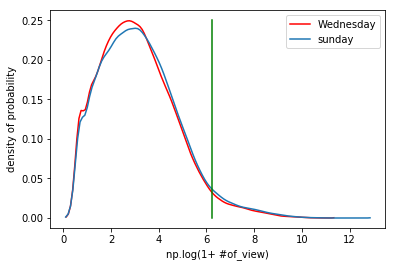

In [68]:
sns.distplot(np.log(1+temp_csv[2].value_counts().values), rug=False, hist=False, color='r', label='Wednesday') # Wednesday
sns.distplot(np.log(1+temp_csv2[2].value_counts().values), rug=False, hist=False, label='sunday') # sunday
plt.plot([np.log(1 + 500),np.log(1 + 500)], [0.0,0.25],'g')
plt.xlabel('np.log(1+ #of_view)')
plt.ylabel('density of probability')

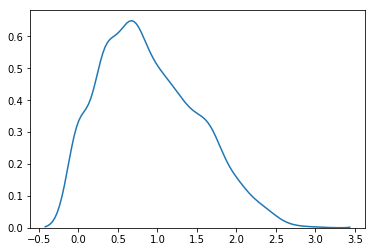

In [19]:
sns.distplot(np.log10(mmp).values, rug=False, hist=False)

/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


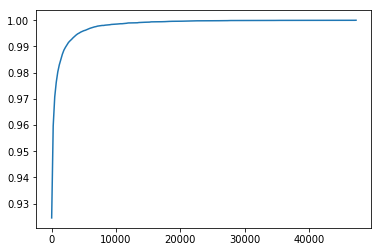

In [17]:
h1 = plt.hist(temp_csv[2].value_counts().values, bins=200,normed=True)
plt.clf()
plt.plot(h1[1][:-1], np.add.accumulate(h1[0])/np.sum(h1[0]))

In [21]:
url_dict = np.load('url_dict.npy')
df_dict = url_dict.item()

In [28]:
temp_csv = temp_csv.iloc[:, [2,4]]
temp_csv = temp_csv.dropna()
temp_csv[4] = temp_csv[4].map(lambda x: df_dict[x])
temp_csv[4] = temp_csv[4].map(lambda x: str(x))
df_session = temp_csv.groupby(2).apply(lambda x: ' '.join(list(x[4])))
df_session = pd.DataFrame(df_session)
df_session = df_session.reset_index()
df_session.columns = ['uuid', 'url_session']
df_session.url_session = df_session.url_session.map(lambda x: x.split(' '))

In [70]:
df_session['session_length'] = df_session.url_session.map(lambda x: len(x))

In [79]:
df_order = pd.read_csv('' + 'pay_order.tsv.gz', sep = '\t', compression='gzip')

In [83]:
df_order_user_list = df_order.account_id.value_counts()

In [86]:
df_order_user_list = pd.DataFrame(df_order_user_list)

In [89]:
df_order_user_list = df_order_user_list.reset_index()

In [90]:
df_order_user_list.columns = ['account_id','purchase_amount']

In [93]:
df_merge = paring_table.merge(df_order_user_list, left_on='vuid', right_on='account_id', how='inner')

In [111]:
df_merge = df_merge[['id', 'id', 'purchase_amount']]

In [114]:
df_finel = df_merge.merge(df_session, left_on='id', right_on='id', how='inner')

In [117]:
df_finel.shape, df_session.shape

((39926, 5), (54836, 3))

In [120]:
df_finel.session_length.values

array([ 77,   2,  13, ..., 123,  11, 101])

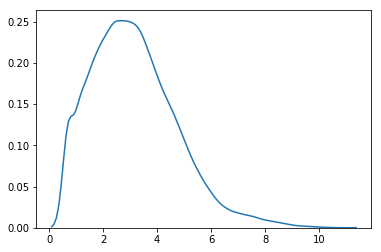

In [137]:
sns.distplot(np.log(1 + df_finel.session_length.values), rug=False, hist=False)

In [215]:
len(df_finel.loc[df_finel.session_length >=500])

1630

In [140]:
len(df_finel.loc[df_finel.session_length >=1000])

968

In [230]:
df_finel.loc[df_finel.session_length>=5].shape

(32106, 5)

In [219]:
temp_csv.loc[temp_csv[2] == 'Vy53x8Co4U8AAAE8xb8AAAAA'][4].value_counts().values

array([1187,  499,  442,  432,  363,  320,  313,  248,  245,  235,  223,
        210,  205,  191,  178,  178,  170,  169,  160,  159,  159,  157,
        156,  156,  147,  145,  142,  121,  109,  108,  107,  102,   87,
         78,   72,   70,   69,   69,   64,   61,   60,   58,   57,   56,
         54,   54,   53,   53,   52,   52,   51,   51,   48,   47,   47,
         46,   46,   46,   45,   45,   45,   44,   44,   44,   44,   44,
         44,   42,   42,   42,   42,   41,   41,   41,   40,   40,   40,
         39,   39,   38,   36,   36,   35,   35,   33,   33,   30,   30,
         30,   29,   28,   26,   25,   24,   23,   22,   21,   21,   21,
         21,   21,   20,   20,   20,   19,   19,   19,   19,   18,   18,
         18,   18,   18,   17,   17,   17,   16,   16,   16,   16,   14,
         14,   14,   14,   14,   14,   14,   14,   13,   13,   13,   13,
         13,   12,   12,   12,   12,   12,   12,   12,   12,   12,   11,
         11,   11,   11,   11,   11,   11,   11,   